# Systems Immunogenetics Project

## WNV Flow Cytometry Data Plotting

### McWeeney Lab, Oregon Health & Science University

#### Author: Michael Mooney (mooneymi@ohsu.edu)

## Introduction

This document will walk through the steps for creating various plots of the flow cytometry data. 

Required Files:

- This notebook (`SIG_WNV_Flow_Data_Plotting.ipynb`): [[Download here]](https://raw.githubusercontent.com/mooneymi/jupyter_notebooks/master/r/SIG/SIG_WNV_Flow_Data_Plotting.ipynb)
- The R script `flow_data_plotting_functions.r`: [[Download here]](https://raw.githubusercontent.com/mooneymi/jupyter_notebooks/master/r/SIG/flow_data_plotting_functions.r)

** Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://raw.githubusercontent.com/mooneymi/jupyter_notebooks/master/r/SIG/SIG_WNV_Flow_Data_Plotting.r)

**All code is available on GitHub: [https://github.com/mooneymi/jupyter_notebooks/tree/master/r/SIG](https://github.com/mooneymi/jupyter_notebooks/tree/master/r/SIG)**

#### Previous: Flow Cytometry Dat Cleaning

Go back to the previous workflow to see how the data is prepared before plotting: [[Flow Cytometry Data Cleaning]](http://nbviewer.jupyter.org/github/mooneymi/jupyter_notebooks/blob/master/r/SIG/SIG_WNV_Flow_Data_Cleaning.ipynb)

## Step 1. Load the Necessary R Libraries and Functions

There are a number of functions in the accompanying R script (flow_data_cleaning_functions.r) necessary for parsing and then processing the flow cytometry data:

1. `flow_boxplot_data()`: 
2. `flow_boxplots()`:
3. `flow_multiline_plot_data()`:
4. `flow_multine_plots()`:
5. `flow_heatmap_data()`:
6. `flow_heatmap_plot()`:

More information on each of these functions is available by calling the `describe()` function. For example, the following command will print documentation for the `flow_boxplot_data()` function:

    describe(flow_boxplot_data)

Remember that, in addition to the help documentation provided with `describe()`, you can view the actual function definitions at any time by simply typing the function name without parentheses (e.g. `describe`) at the command prompt.

In [1]:
## Load functions for plotting the flow cytometry data
source('flow_data_plotting_functions.r')

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size



## Step 2. Load the Data

In [2]:
## Load data from an Excel spreadsheet (Warning: this can take a few minutes)
## Note: you may have to change the file paths
#flow_full = read.xls('../Cleaned_Data_Releases/15-Jan-2016/Lund_Flow_Full_11-Jan-2016_final.xlsx', 
#                     header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))
## Load data from an R data file
load('../Cleaned_Data_Releases/r_data_files/lund_flow_full_11-jan-2016_final.rda')

## Step 3. Create Box Plots

In [3]:
describe(flow_boxplot_data)


This function aggregates the data needed for creating boxplots of the flow cytometry data.

Parameters:
flow_df: The dataframe containing the flow data.
lines: A numeric vector containing the mouse lines that should be plotted.
tissue: A string indicating the tissue (e.g. 'brain' or 'spleen').
flow_vars: A string indicating the flow variable to be plotted.
tp: A character vector containing the time points to be included.
line_colors: A vector of colors (default=NULL; colors will be determined automatically).
mocks_only: Logical value indicating whether mocks only will be plotted.
data_type: A number indicating whether percentages (1) or absolute cell counts (2) will be plotted.

Returns:
A list containing the data to be plotted; input for the flow_boxplots() function.



In [4]:
## Aggregate the data for boxplots
boxplot_data = flow_boxplot_data(flow_full, c(7,8,9), 'brain', 'treg_T_regs', c('7','12','21','28'))

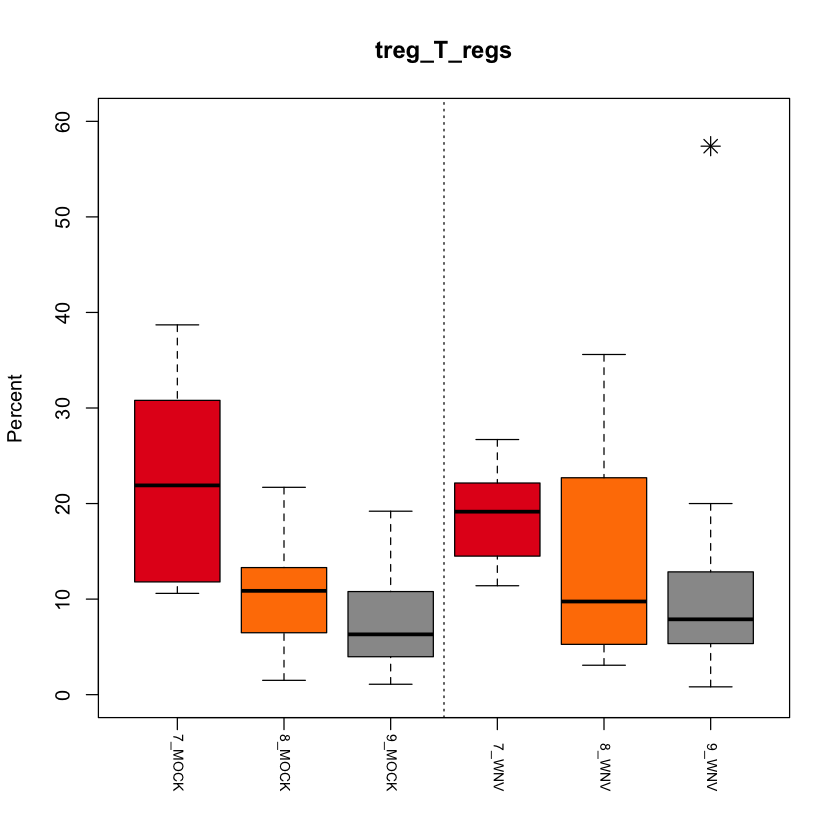

In [5]:
## Create a list of additional options for the boxplot
opts = list(rm_outliers=F, show_data=F, y_min=0, y_max=60)
## Create the boxplot (the 'cex' parameter controls the size of the x-axis text)
bp = flow_boxplots(c(boxplot_data, opts), cex=0.7)

### Step 3b. View Interactive Boxplots

The plotting functions used above have been adapted for a Shiny app: [http://church.ohsu.edu:3838/mooneymi/wnv_flow_boxplots/](http://church.ohsu.edu:3838/mooneymi/wnv_flow_boxplots/)

## Step 4. Create Time Series Plots

In [6]:
describe(flow_multiline_plot_data)


This function aggregates the data needed for creating time-series plots of the flow cytometry data. 

Parameters:
flow_df: The dataframe containing the flow data.
uw_lines: A numeric vector containing the mouse lines to be plotted.
tissue: A string indicating the tissue (e.g. 'brain' or 'spleen').
flow_vars: A character vector containing the variables to be plotted.
plot_type: A number indicating whether the plot will compare lines (1) or compare variables (2).
FUN: A function that can be applied to transform the data (default=NULL).

Returns:
A list containing the data to be plotted; input for the flow_multiline_plots() function.



In [7]:
lineplot_data = flow_multiline_plot_data(flow_full, c(7,8,9), 'brain', 'treg_T_regs', 1)

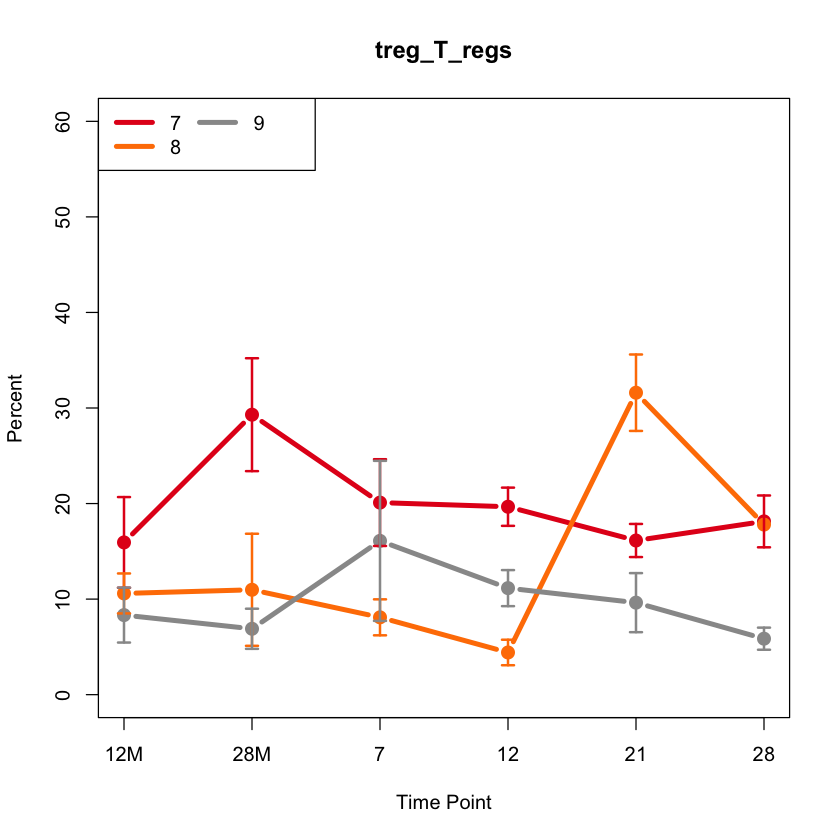

In [8]:
## Create a list of additional options for the lineplot
## data_type values: 1 = percentages, 2 = cell counts, 3 = percent ratio, 4 = count ratio
opts2 = list(data_type=1, y_min=0, y_max=60)
## Create a lineplot that compares a single variable across multiple lines
lp = flow_multiline_plots(c(lineplot_data, opts2))

In [9]:
lineplot_data2 = flow_multiline_plot_data(flow_full, c(9), 'brain', c('treg_T_regs', 'tcell_d7_CD8'), 2)

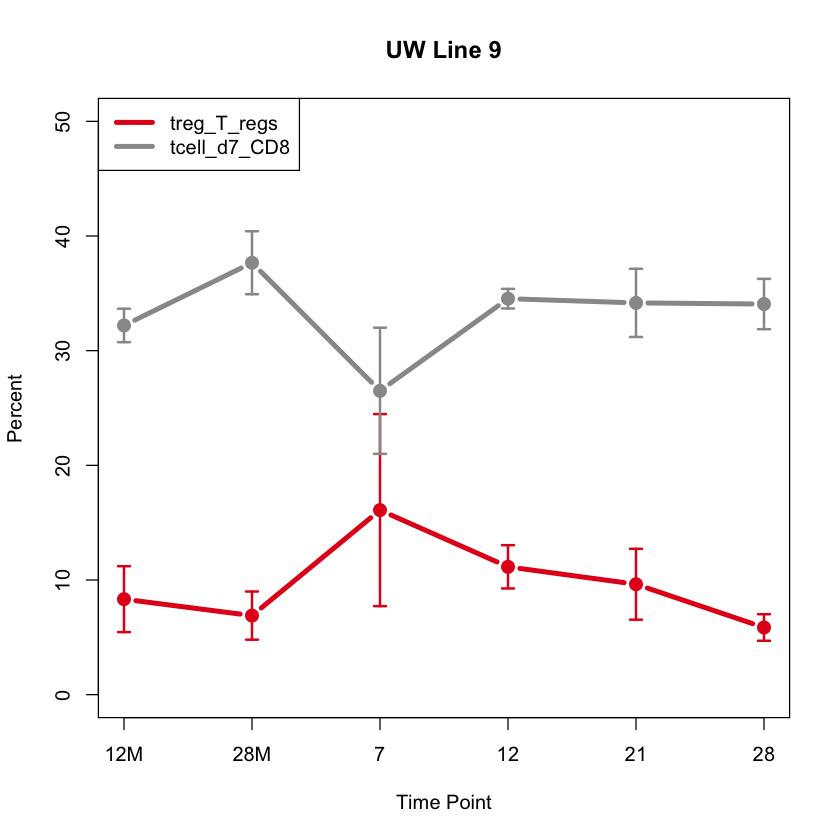

In [10]:
## Create a list of additional options for the lineplot
## data_type values: 1 = percentages, 2 = cell counts, 3 = percent ratio, 4 = count ratio
opts3 = list(data_type=1, y_min=0, y_max=50)
## Create a lineplot that compares multiple variables for a single line
lp2 = flow_multiline_plots(c(lineplot_data2, opts3))

### Step 4b. View Interactive Time Series Plots

The plotting functions used above have been adapted for a Shiny app: [http://church.ohsu.edu:3838/mooneymi/wnv_flow_lineplots/](http://church.ohsu.edu:3838/mooneymi/wnv_flow_lineplots/)

## Step 5. Create Flow Heatmaps

These heatmaps are annotated with weight loss, clinical scores, and heritability estimates. This data must be loaded before calling the functions for aggregating the data and plotting. If you want to exclude these annotations, you can skip the next code block and supply the `'annotations=FALSE'` option to the plotting functions (an example is below).

In [11]:
## Load weight, clinical score, and heritability data from the latest data release
## Note: you may have to change the file paths
weights = read.xls('../Cleaned_Data_Releases/15-Jan-2016/Lund_Weight_13-Jan-2016_final.xlsx',
                        header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))
scores = read.xls('../Cleaned_Data_Releases/15-Jan-2016/Lund_Scores_13-Jan-2016_final.xlsx',
                       header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))
heritability = read.xls('../Cleaned_Data_Releases/15-Jan-2016/Lund_Flow_Heritability_11-Jan-2016_final.xlsx',
                        header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))

## Set the rownames of the heritability dataframe
rownames(heritability) = heritability$variable

In [12]:
describe(flow_heatmap_data)


This function aggregates the data needed for creating time-series plots of the flow cytometry data. 

Parameters:
flow_df: The dataframe containing the flow data.
lines: A numeric vector containing the lines to be plotted.
tissue: A string indicating the tissue (e.g. 'brain' or 'spleen').
flow_vars: A character vector containing the variables to be plotted.
tp: A character vector containing the timepoints to be plotted.
herit_df: The dataframe containing the heritability estimates (default=NULL);
line_colors: A vector of color values (default=NULL; colors will be determined automatically).
mocks_only: A logical indicating whether mocks only should be plotted.
no_cluster: A logical indicating whether variables should be clustered.
cluster_all: A logical indicating whether the variables should be clustered using all the data.
annotations: A logical indicating whether annotations should be added to the heatmap (default=TRUE).

Returns:
A list containing the data to be plotted; input for 

In [13]:
heatmap_data = flow_heatmap_data(flow_full, c(7,8,9), 'brain', 
                                 c('treg_T_regs', 'tcell_d7_CD3', 'tcell_d7_CD4', 'tcell_d7_CD8'),
                                 c('7','12','21','28'), heritability)

In [14]:
describe(flow_heatmap_plot)


This function plots the data returned by flow_multiline_plot_data().

Parameters:
hm_data: This should be a list returned by flow_heatmap_data().
weights_df: The dataframe containing the weight loss data (default=NULL).
clinical_df: The dataframe containing the clinical score data (default=NULL).
weight_cols: A character vector containing the columns names of the weight measurements (default=weight_percents). 
cs_cols: A character vector containing the columns names of the clinical scores (default=cs_columns). 
annotations: A logical indicating whether annotations should be added to the heatmap (default=TRUE).

Returns:
NULL

Examples:
flow_heatmap_plot(heatmap_data, weights, scores)




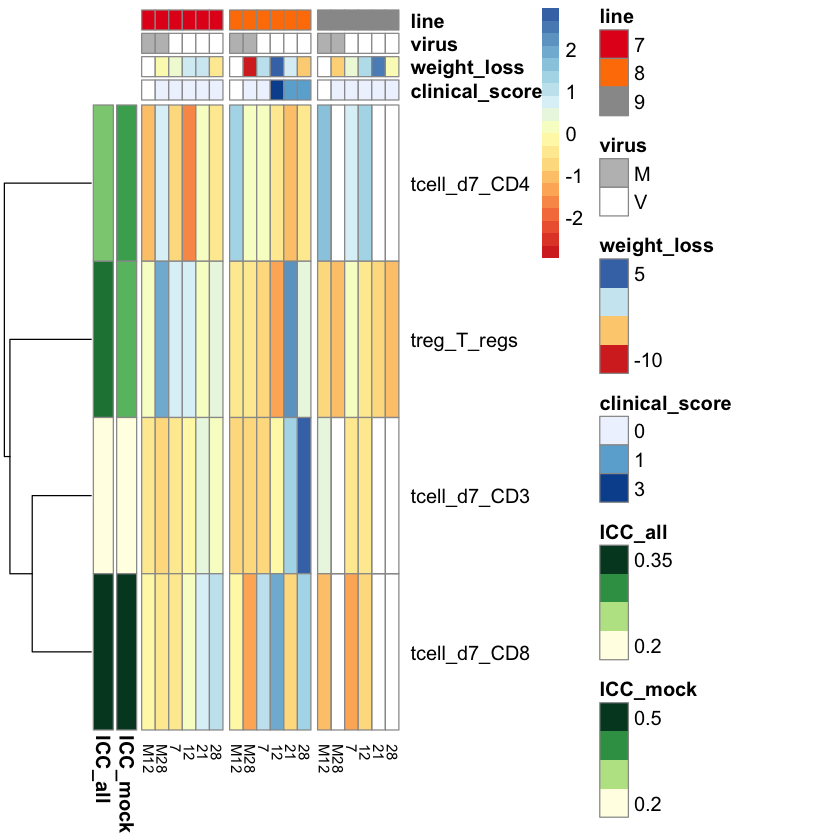

In [15]:
## Create the heatmap
hm = flow_heatmap_plot(heatmap_data, weights, scores)

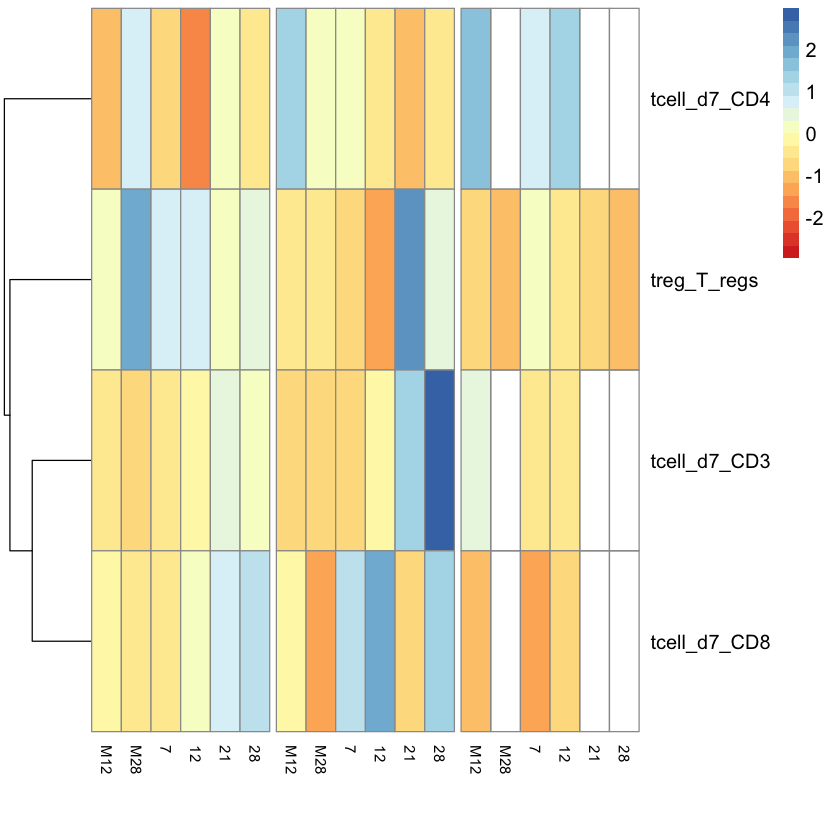

In [16]:
## The heatmap without annotations
heatmap_data2 = flow_heatmap_data(flow_full, c(7,8,9), 'brain', 
                                 c('treg_T_regs', 'tcell_d7_CD3', 'tcell_d7_CD4', 'tcell_d7_CD8'),
                                 c('7','12','21','28'), annotations=F)
hm2 = flow_heatmap_plot(heatmap_data2, annotations=F)

### Step 5b. View Interactive Heatmaps

The plotting functions used above have been adapted for a Shiny app: [http://church.ohsu.edu:3838/mooneymi/wnv_flow_heatmaps/](http://church.ohsu.edu:3838/mooneymi/wnv_flow_heatmaps/)

#### Last Updated: 26-Jan-2016